# 비정상 절차서 15-08: 증기발생기 수위 채널 고장 (고)

경보 및 증상

자동 동작사항

긴급 조치사항

후속 조치사항

## 1.0 데이터 처리

In [40]:
import pickle
import matplotlib.pyplot as plt
from collections import deque
with open('D:/1.All_python_project/New_CNS_db/ab15_08_1069_(124).pkl', 'rb') as f:
    db = pickle.load(f)
sym_ch = {'BFV478':deque(maxlen=5), 'BFV488':deque(maxlen=5), 'BFV498':deque(maxlen=5), 'WFWLN1':deque(maxlen=5), 'WFWLN2':deque(maxlen=5), 'WFWLN3':deque(maxlen=5),
          'ZSGN1':deque(maxlen=5), 'ZSGN2':deque(maxlen=5), 'ZSGN3':deque(maxlen=5)}

## 2.0 경보 및 증상

#### ※ 주의 사항 : 선택되지 않은 SG 수위 채널 고장 시는 경보만 발생

### 2.1 해당 ‘SG WTR LEVEL DEVIATION HIGH/LOW’ 경보 발생(NR 50±5 %)

경보 없음 => 편차 : 관측값 - 평균 을 이용하여 직접 구하기 

high/low 기준 설정 필요

### 2.2 해당 ‘SG  WTR LEVELHIGH-HIGH’ 경보 발생(NR 78 %)

ALARM LOGIC

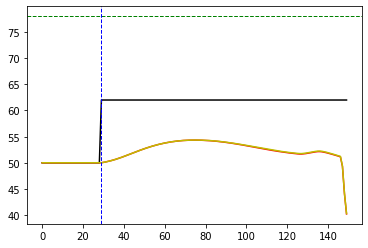

In [17]:
# ZINST78 : 증기발생기 1LOOP 수위 narrow
# ZINST77 : 증기발생기 2LOOP 수위 narrow
# ZINST76 : 증기발생기 3LOOP 수위 narrow
plt.plot(db['ZINST78'], color='k')
plt.plot(db['ZINST77'], color='r')
plt.plot(db['ZINST76'], color='y')
vline = plt.axhline(78, color='g', linestyle='--', linewidth=1)
vline = plt.axvline(29, color='b', linestyle='--', linewidth=1)

In [19]:
sg_level = []
for i in range(len(db)):
    if i > 29:
        if db['ZINST78'][i] > 78 or db['ZINST77'][i] > 78 or db['ZINST76'][i] > 78:
            sg_level.append(i+1)
if len(sg_level) == 0:
    print('증상을 만족하지 못했습니다.')
else:
    print(f'최초 해당‘SG WATER LEVEL HIGH’경보 발생 시간 : {sg_level[0]}초')

증상을 만족하지 못했습니다.


15-08의 모든 데이터가 증기발생기 수위는 증가하나 78%를 넘지 않습니다. 

### 2.3 해당 SG 상태등에서 ‘STM GEN CH LEVEL HI-HI’ 점등
(AE-LT476/486/496 : 해당 SG의 CH C 점등)

SG의 채널변수를 찾지 못하였습니다.

### 2.4 증기발생기 수위 DCS Monitor에 해당 증기발생기 ‘LVL CH FAIL’ 경보등 	점등 및 Buzzer 울림, 경보 프린터 출력

### 2.5 해당 SG의 ACS/DCS 제어 선택 스위치가 DCS 제어 Mode로 자동 전환 되지 않았거나 서서히 급수유량 감소가 진행되어 즉시 조치하지 않을 경우 아래 사항 진행됨

### 2.5.1 해당 SG MFCV 닫힘 방향으로 진행 및 해당 SG 실제 급수유량 감소

MFCV OPEN STATE

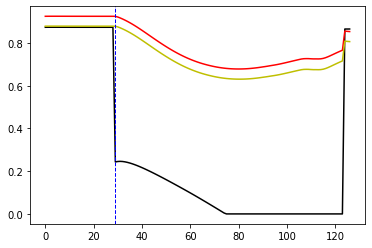

In [32]:
# BFV478 : 주급수 제어밸브1
# BFV488 : 주급수 제어밸브2
# BFV498 : 주급수 제어밸브3
plt.plot(db['BFV478'], color='k')
plt.plot(db['BFV488'], color='r')
plt.plot(db['BFV498'], color='y')
vline = plt.axvline(29, color='b', linestyle='--', linewidth=1)

급수 유량

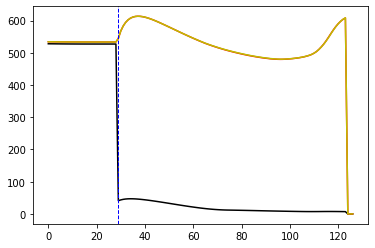

In [33]:
# WFWLN1 : 급수유량1
# WFWLN2 : 급수유량2
# WFWLN3 : 급수유량3
plt.plot(db['WFWLN1'], color='k')
plt.plot(db['WFWLN2'], color='r')
plt.plot(db['WFWLN3'], color='y')
vline = plt.axvline(29, color='b', linestyle='--', linewidth=1)

In [34]:
valve_flow_state = []
for i in range(len(db)):
    if i > 29:
        sym_ch['BFV478'].append(db['BFV478'][i])
        sym_ch['BFV488'].append(db['BFV488'][i])
        sym_ch['BFV498'].append(db['BFV498'][i])
        sym_ch['WFWLN1'].append(db['WFWLN1'][i])
        sym_ch['WFWLN2'].append(db['WFWLN2'][i])
        sym_ch['WFWLN3'].append(db['WFWLN3'][i])
        if len(sym_ch['BFV478']) == 5:
            if sym_ch['BFV478'][0] > sym_ch['BFV478'][1] > sym_ch['BFV478'][2] > sym_ch['BFV478'][3] > sym_ch['BFV478'][4]:
                if sym_ch['WFWLN1'][0] > sym_ch['WFWLN1'][1] > sym_ch['WFWLN1'][2] > sym_ch['WFWLN1'][3] > sym_ch['WFWLN1'][4]: 
                    valve_flow_state.append(i+1)

            elif sym_ch['BFV488'][0] > sym_ch['BFV488'][1] > sym_ch['BFV488'][2] > sym_ch['BFV478'][3] > sym_ch['BFV478'][4]:
                if sym_ch['WFWLN2'][0] > sym_ch['WFWLN2'][1] > sym_ch['WFWLN2'][2] > sym_ch['WFWLN1'][3] > sym_ch['WFWLN1'][4]: 
                    valve_flow_state.append(i+1)

            elif sym_ch['BFV498'][0] > sym_ch['BFV498'][1] > sym_ch['BFV498'][2] > sym_ch['BFV478'][3] > sym_ch['BFV478'][4]:
                if sym_ch['WFWLN3'][0] > sym_ch['WFWLN3'][1] > sym_ch['WFWLN3'][2] > sym_ch['WFWLN1'][3] > sym_ch['WFWLN1'][4]: 
                    valve_flow_state.append(i+1)
if len(valve_flow_state) == 0:
    print('증상을 만족하지 못했습니다.')
else:
    print(f'최초 밸브 닫힘 방향으로 진행 및 유량 감소 시간 : {valve_flow_state[0]}초')

최초 밸브 닫힘 방향으로 진행 및 유량 감소 시간 : 39초


#### 2.5.2 해당 ‘SG STM/FW FLOW DEVIATION’ 경보 발생(±10 %)

ALARM LOGIC

증기 유량

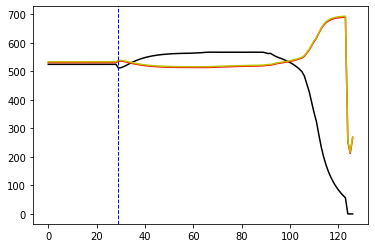

In [35]:
# WSTM1 : 증기 유량1
# WSTM2 : 증기 유량2
# WSTM3 : 증기 유량3
plt.plot(db['WSTM1'], color='k')
plt.plot(db['WSTM2'], color='r')
plt.plot(db['WSTM3'], color='y')
vline = plt.axvline(29, color='b', linestyle='--', linewidth=1)
print()

급수 유량

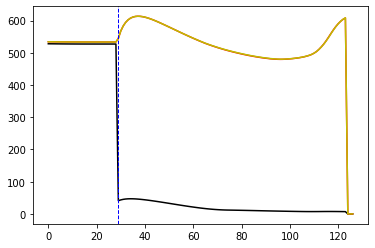

In [36]:
# WFWLN1 : 급수 유량1
# WFWLN2 : 급수 유량2
# WFWLN3 : 급수 유량3
plt.plot(db['WFWLN1'], color='k')
plt.plot(db['WFWLN2'], color='r')
plt.plot(db['WFWLN3'], color='y')
vline = plt.axvline(29, color='b', linestyle='--', linewidth=1)

ALARM

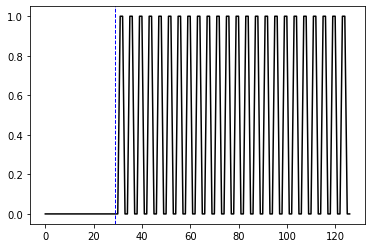

In [37]:
# KLAMPO320 :ALARM: SG 1,2,3 STM/FW FLOW DEVIATION(10% OF LOOP FLOW) 
plt.plot(db['KLAMPO320'], color='k')
vline = plt.axvline(29, color='b', linestyle='--', linewidth=1)

In [38]:
deviation_alarm = []
# deviation setpioint
RSTFWD = {1:db['WSTM1'] * 0.1,
          2: db['WSTM2'] * 0.1,
          3: db['WSTM3'] * 0.1}
for i in range(len(db)):
    if i > 29:
        if abs(db['WSTM1'][i] - db['WFWLN1'][i]) > abs(RSTFWD[1][i]) or abs(db['WSTM2'][i] - db['WFWLN2'][i]) > abs(RSTFWD[2][i]) or abs(db['WSTM3'][i] - db['WFWLN3'][i]) > abs(RSTFWD[3][i]):
            deviation_alarm.append(i+1)
if len(deviation_alarm) == 0:
    print('증상을 만족하지 못했습니다.')
else:
    print(f'최초‘SG STM/FW FLOW DEVIATION’경보 발생(±10 %) 시간 : {deviation_alarm[0]}초')

최초‘SG STM/FW FLOW DEVIATION’경보 발생(±10 %) 시간 : 31초


### 2.5.3 해당 SG 실제 수위 감소

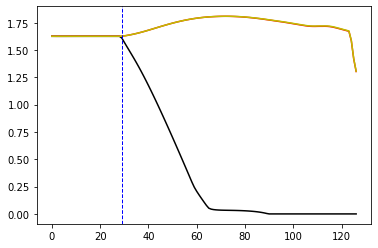

In [39]:
# ZSGN1 : SG 수위1 NARROW RANGE
# ZSGN2 : SG 수위2 NARROW RANGE
# ZSGN3 : SG 수위3 NARROW RANGE
plt.plot(db['ZSGN1'], color='k')
plt.plot(db['ZSGN2'], color='r')
plt.plot(db['ZSGN3'], color='y')
vline = plt.axvline(29, color='b', linestyle='--', linewidth=1)

In [42]:
sg_level_state = []
for i in range(len(db)):
    if i > 29:
        sym_ch['ZSGN1'].append(db['ZSGN1'][i])
        sym_ch['ZSGN2'].append(db['ZSGN2'][i])
        sym_ch['ZSGN3'].append(db['ZSGN3'][i])
        if len(sym_ch['ZSGN1']) == 5:
            if sym_ch['ZSGN1'][0] > sym_ch['ZSGN1'][1] > sym_ch['ZSGN1'][2]:
                sg_level_state.append(i+1)
                
            elif sym_ch['ZSGN2'][0] > sym_ch['ZSGN2'][1] > sym_ch['ZSGN2'][2]:
                sg_level_state.append(i+1)
                    
            elif sym_ch['ZSGN3'][0] > sym_ch['ZSGN3'][1] > sym_ch['ZSGN3'][2]:
                sg_level_state.append(i+1)
if len(sg_level_state) == 0:
    print('증상을 만족하지 못했습니다.')
else:
    print(f'최초 증기발생기 수위 감소 시간 : {sg_level_state[0]}초')

최초 증기발생기 수위 감소 시간 : 31초


### 2.5.4 해당 ‘SG WTR LEVEL DEVIATION HIGH/LOW’ 경보 (NR 50±5%)

경보 없음 => 편차 : 관측값 - 평균 을 이용하여 직접 구하기 

high/low 기준 설정 필요

### 2.5.5 해당 ‘SG WATER LEVEL LOW’ (NR 25%)

ALARM LOGIC

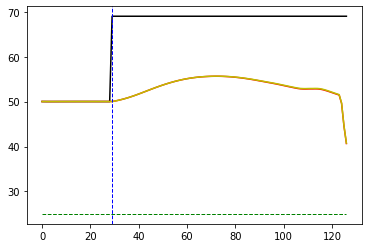

In [43]:
# CZSGW : 증기발생기 수위 저 SETPOINT [0-1]
# ZINST78 : 증기발생기 1LOOP 수위
# ZINST77 : 증기발생기 2LOOP 수위
# ZINST76 : 증기발생기 3LOOP 수위
plt.plot(db['CZSGW']*100, color='g', linestyle='--', linewidth=1)
plt.plot(db['ZINST78'], color='k')
plt.plot(db['ZINST77'], color='r')
plt.plot(db['ZINST76'], color='y')
vline = plt.axvline(29, color='b', linestyle='--', linewidth=1)

ALARM

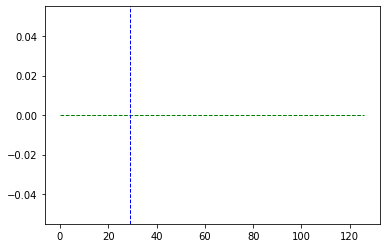

In [44]:
# KLAMPO319': 알람 SG 1,2,3 level lo
plt.plot(db['KLAMPO319'], color='g', linestyle='--', linewidth=1)
vline = plt.axvline(29, color='b', linestyle='--', linewidth=1)

In [45]:
sg_level_lo = []
for i in range(len(db)):
    if i > 29:
        if db['ZINST78'][i] < db['CZSGW'][i]*100 or db['ZINST77'][i] < db['CZSGW'][i]*100 or db['ZINST76'][i] < db['CZSGW'][i]*100:
            sg_level_lo.append(i+1)
if len(sg_level_lo) == 0:
    print('증상을 만족하지 못했습니다.')
else:
    print(f'최초 해당‘SG WATER LEVEL LOW’경보 발생 시간 : {sg_lesg_level_lovel[0]}초')

증상을 만족하지 못했습니다.


### 2.5.6 해당 SG WTR LEVELLOW-LOW(NR 17%)에 의한 원자로정지 발생 가능

ALARM LOGIC

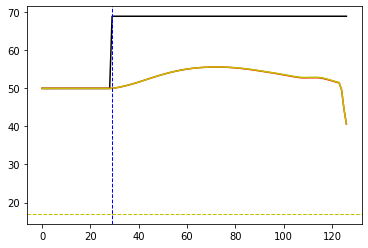

In [46]:
# ZINST78 : 증기발생기 1LOOP 수위
# ZINST77 : 증기발생기 2LOOP 수위
# ZINST76 : 증기발생기 3LOOP 수위
plt.plot(db['ZINST78'], color='k')
plt.plot(db['ZINST77'], color='r')
plt.plot(db['ZINST76'], color='y')
sg_level_low_point = plt.axhline(17, color='y', linestyle='--', linewidth=1) #low-low 기준 17%
vline = plt.axvline(29, color='b', linestyle='--', linewidth=1)

In [47]:
sg_level_lolo = []
for i in range(len(db)):
    if i > 29:
        if db['ZINST78'][i] < 17 or db['ZINST77'][i] < 17 or db['ZINST76'][i] < 17:
            sg_level_lolo.append(i+1)
if len(sg_level_lolo) == 0:
    print('증상을 만족하지 못했습니다.')
else:
    print(f'최초 해당‘SG WATER LEVEL LOW’경보 발생 시간 : {sg_level_lolo[0]}초')

증상을 만족하지 못했습니다.


## 4.0 긴급 조치사항

### 4.1 증기발생기 제어반(JP007) 경보창에서 해당 경보 확인

### 4.2 고장난 SG 수위 지시계 확인, 선택된 채널 고장일 경우 아래 절차에 따라 확인 및 조치 

### 4.3 해당 SG의 ACS/DCS 제어 선택 스위치(AE-HS478/488/498): ACS → DCS 자동 전환 확인, 전환되지 않았으면 아래 절차에 따라 수동으로 DCS 전환

### 4.3.1 해당 MFCV 제어기(AE-FIK478/488/498)를 자동에서 수동으로 전환

### 4.3.2 해당 MFCV 제어기(AE-FIK478/488/498) 요구신호 변화 없으면 비정상 발생 전 요구신호 값으로 복구하여 SG 수위를 안정시킨 후 수동으로 DCS 전환

### 4.4 모든 SG 수위가 정상 (50±5%)으로 유지되는지 확인

### 4.5 해당 SG 수위 채널 선택스위치(AE-HS478Z/488Z/498Z)를 건전한 채널로 전환 

## 5.0 후속 조치사항